In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

problem = 'AB'

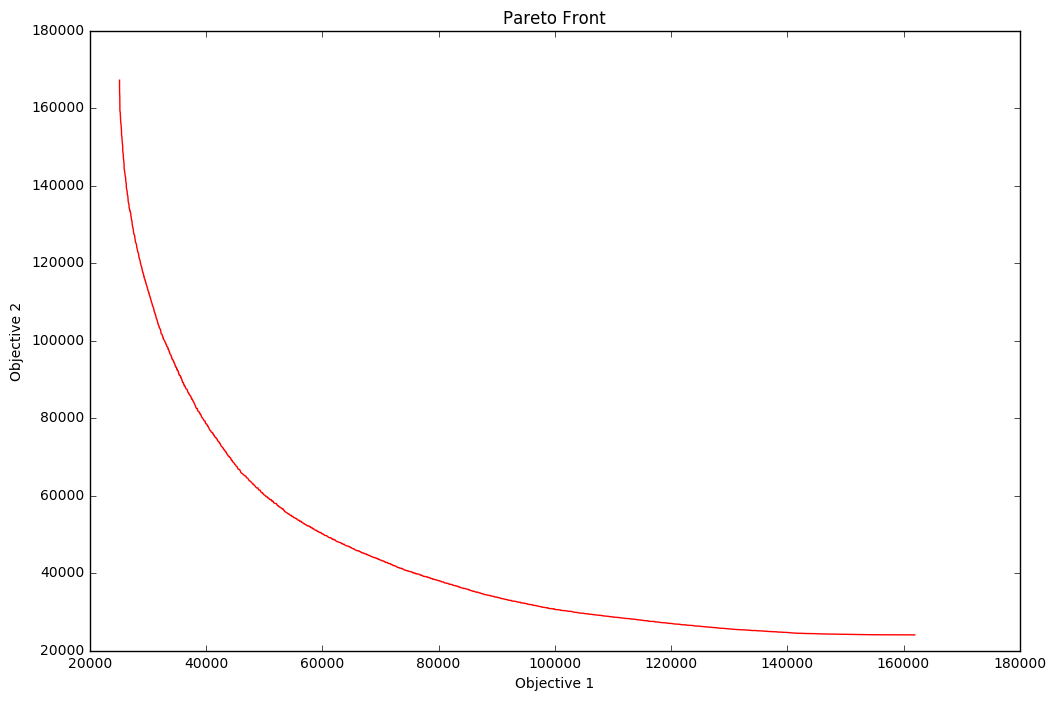

In [2]:
front = []

with open('data/best.euclid' + problem + '100.tsp') as f:
    for line in f:
        front.append(map(int, line.split()))
    
front = zip(*front)
        
plt.figure(figsize=(12, 8))
plt.plot(front[0], front[1], 'r-')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.show()

In [3]:
def HV(reference_point):
    def calculate_hyper_volume(front):
        def volume(individual):
            hyper_cuboid_sides = []
            for i in range(len(reference_point)):
                side_length = abs(individual[i] - reference_point[i])
                hyper_cuboid_sides.append(side_length)
            return reduce(lambda x, y: x*y, hyper_cuboid_sides, 1)

        return reduce(lambda sum, individual: sum + volume(individual), front, 0) / len(front)
    return calculate_hyper_volume

print 'Optimal HV:', HV([200000, 200000])(zip(*front))

Optimal HV: 17035431968


### Wyznaczanie frontu Pareto algorytmem NSGA-II

In [4]:
import sys

sys.path.append('../nsga2/')

from metrics.problems.motsp import MOTSPMetricsAB
from nsga2.evolution import Evolution
from nsga2.problems.motsp import MOTSP
from nsga2.problems.motsp.motsp_definitions import MOTSPDefinitions

def print_statistics(population, iteration):
    PF = population.fronts[0]
    metrics = MOTSPMetricsAB()
    print("Iteration %03d: HV = %0.2f, HVR = %0.2f" % (iteration, metrics.HV(PF), metrics.HVR(PF)))

statistics = []
def log_statistics(population, iteration):
    ranks = [individual.rank for individual in population]
    crowding_distances = [individual.crowding_distance for individual in population]
    objectives = [individual.objectives for individual in population]

    pareto_front = population.fronts[0]
    metrics = MOTSPMetricsAB()
    hv = metrics.HV(pareto_front)
    hvr = metrics.HVR(pareto_front)

    statistics.append((hv, hvr, ranks, crowding_distances, objectives))

In [5]:
def plot_PF(results):
    PF = np.array([i.objectives for i in results])

    plt.figure(figsize=(12, 8))
    plt.plot(PF[:, 0], PF[:, 1], 'ro')
    plt.xlabel('Objective 1')
    plt.ylabel('Objective 2')
    plt.title('Pareto Front')
    plt.show()

In [7]:
%%time

statistics = []

pop_size = 100

solver = Evolution(MOTSP(MOTSPDefinitions(problem)), 200, pop_size)
solver.register_on_new_generation(print_statistics)
solver.register_on_new_generation(log_statistics)

results = solver.evolve()

plot_PF(results)

Iteration 000: HV = 3363248901.02, HVR = 0.20
Iteration 001: HV = 4130580586.72, HVR = 0.24
Iteration 002: HV = 4385881901.91, HVR = 0.26
Iteration 003: HV = 4786864853.40, HVR = 0.28
Iteration 004: HV = 4888533495.29, HVR = 0.29
Iteration 005: HV = 5416905815.29, HVR = 0.32
Iteration 006: HV = 5556114128.22, HVR = 0.33
Iteration 007: HV = 5661337864.01, HVR = 0.33
Iteration 008: HV = 5820358904.43, HVR = 0.34
Iteration 009: HV = 5955413872.21, HVR = 0.35
Iteration 010: HV = 5930143106.65, HVR = 0.35
Iteration 011: HV = 5912721017.17, HVR = 0.35
Iteration 012: HV = 6244260977.85, HVR = 0.37
Iteration 013: HV = 6196170062.94, HVR = 0.36
Iteration 014: HV = 6515937006.01, HVR = 0.38
Iteration 015: HV = 6952750446.31, HVR = 0.41
Iteration 016: HV = 6901311287.29, HVR = 0.41
Iteration 017: HV = 6877327778.70, HVR = 0.40
Iteration 018: HV = 6997382856.00, HVR = 0.41
Iteration 019: HV = 7118011449.39, HVR = 0.42
Iteration 020: HV = 7097020119.87, HVR = 0.42
Iteration 021: HV = 7322538431.61,

KeyboardInterrupt: 

Iteration 000: HV = 2750107686.88, HVR = 0.16
Iteration 001: HV = 3364458994.18, HVR = 0.20
Iteration 002: HV = 3864515309.79, HVR = 0.23
Iteration 003: HV = 4533785710.31, HVR = 0.27
Iteration 004: HV = 4566053817.35, HVR = 0.27
Iteration 005: HV = 4846144970.40, HVR = 0.28
Iteration 006: HV = 4959919265.93, HVR = 0.29
Iteration 007: HV = 5003883427.59, HVR = 0.29
Iteration 008: HV = 5207342619.90, HVR = 0.31
Iteration 009: HV = 5483338624.59, HVR = 0.32
Iteration 010: HV = 5827512228.23, HVR = 0.34
Iteration 011: HV = 5718434024.48, HVR = 0.34
Iteration 012: HV = 5797803465.70, HVR = 0.34
Iteration 013: HV = 6597290045.49, HVR = 0.39
Iteration 014: HV = 6828335388.14, HVR = 0.40
Iteration 015: HV = 6807750218.35, HVR = 0.40
Iteration 016: HV = 6831889832.69, HVR = 0.40
Iteration 017: HV = 6278787776.10, HVR = 0.37
Iteration 018: HV = 6904242809.94, HVR = 0.41
Iteration 019: HV = 6681385186.34, HVR = 0.39
Iteration 020: HV = 6465896725.36, HVR = 0.38
Iteration 021: HV = 6788829894.76,

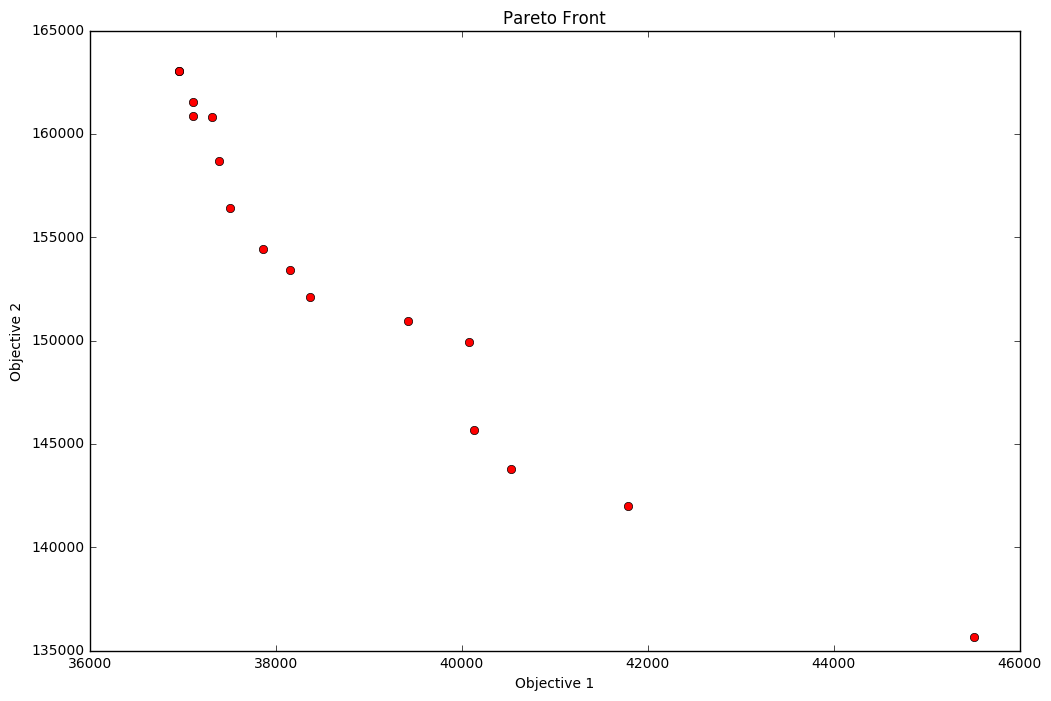

CPU times: user 52.9 s, sys: 377 ms, total: 53.3 s
Wall time: 53 s


In [6]:
%%time

pop_size = 20

solver = Evolution(MOTSP(MOTSPDefinitions(problem)), 50, pop_size)
solver.register_on_new_generation(print_statistics)
solver.register_on_new_generation(log_statistics)

results = solver.evolve()

plot_PF(results)

### Wykres HV i HVR

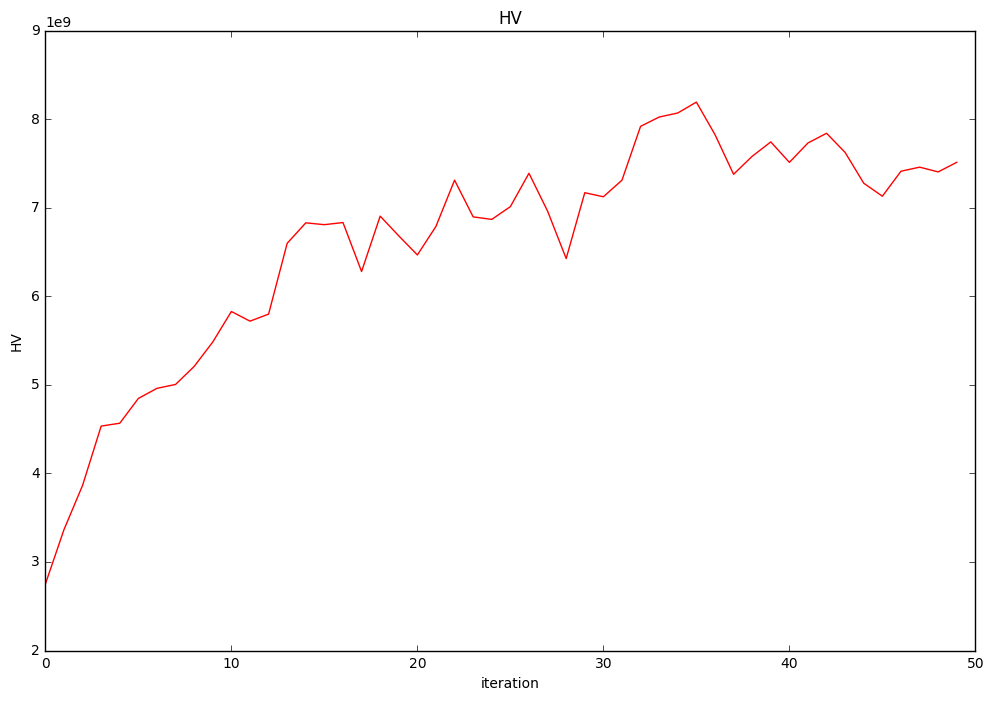

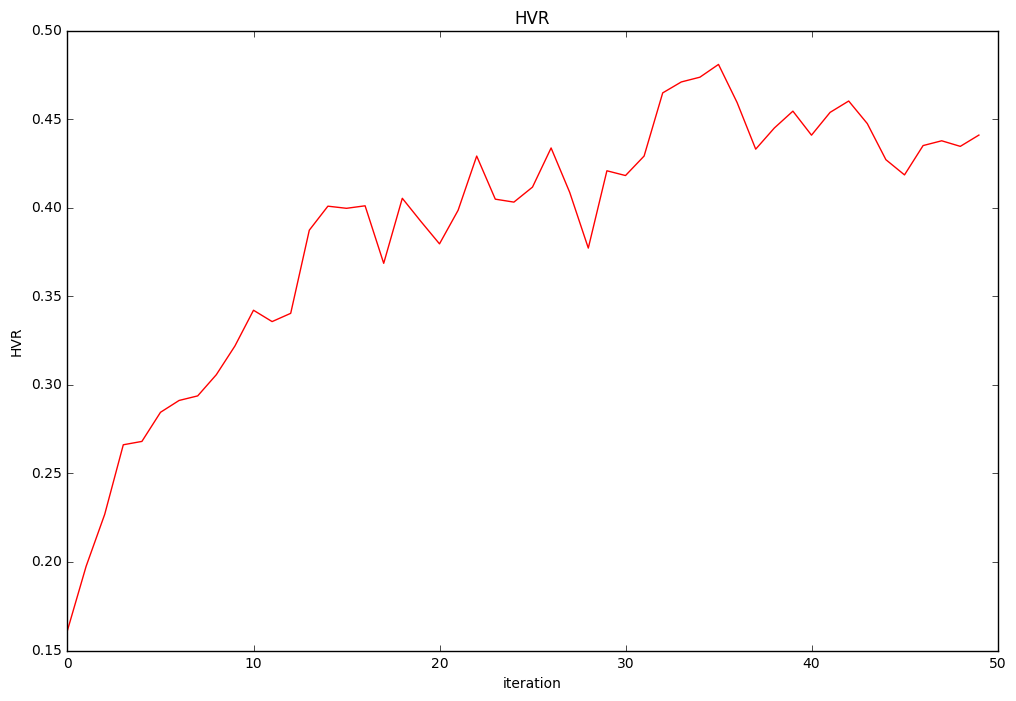

In [7]:
HV = np.array([statistics[i][0] for i in xrange(len(statistics))])
HVR = np.array([statistics[i][1] for i in xrange(len(statistics))])

plt.figure(figsize=(12, 8))
plt.plot(HV, 'r-')
plt.xlabel('iteration')
plt.ylabel('HV')
plt.title('HV')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(HVR, 'r-')
plt.xlabel('iteration')
plt.ylabel('HVR')
plt.title('HVR')
plt.show()

### Wykres przykładowej populacji (ze wskazanej iteracji)

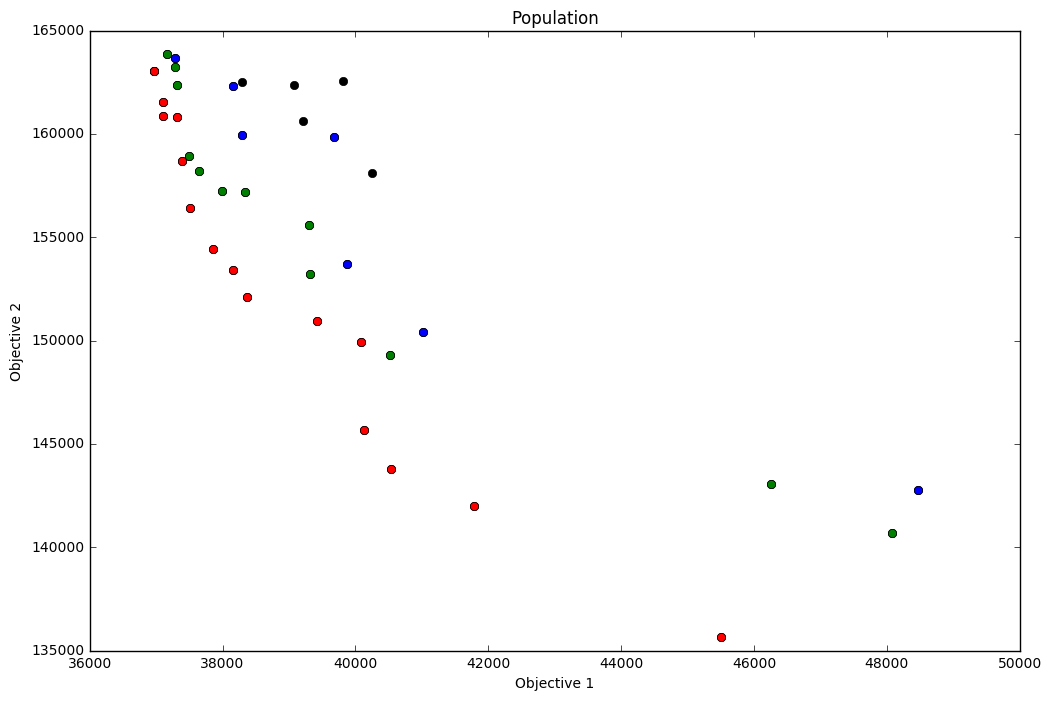

In [8]:
iteration = len(statistics)-1

ranks = np.array(statistics[iteration][2])
objectives = np.array(statistics[iteration][4])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()